# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 602


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?&appid={weather_api_key}&units=imperial"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ribeira grande
Processing Record 2 of Set 1 | tiksi
Processing Record 3 of Set 1 | passos
Processing Record 4 of Set 1 | grytviken
Processing Record 5 of Set 1 | sarupathar
Processing Record 6 of Set 1 | ancud
Processing Record 7 of Set 1 | margaret river
Processing Record 8 of Set 1 | iqaluit
Processing Record 9 of Set 1 | caluula
Processing Record 10 of Set 1 | humaita
Processing Record 11 of Set 1 | tolanaro
Processing Record 12 of Set 1 | mossel bay
Processing Record 13 of Set 1 | edinburgh of the seven seas
Processing Record 14 of Set 1 | port lincoln
Processing Record 15 of Set 1 | kodiak
Processing Record 16 of Set 1 | florence
Processing Record 17 of Set 1 | atafu village
Processing Record 18 of Set 1 | lauro de freitas
Processing Record 19 of Set 1 | taiohae
City not found. Skipping...
Processing Record 20 of Set 1 | isafjordur
Processing Record 21 of Set 1 | kiiminki
Processing Record 2

Processing Record 43 of Set 4 | uturoa
Processing Record 44 of Set 4 | paracuru
Processing Record 45 of Set 4 | sakaiminato
Processing Record 46 of Set 4 | ha tinh
Processing Record 47 of Set 4 | bekondo
Processing Record 48 of Set 4 | port macquarie
Processing Record 49 of Set 4 | steinbach
Processing Record 0 of Set 5 | chibougamau
Processing Record 1 of Set 5 | arish
Processing Record 2 of Set 5 | entebbe
Processing Record 3 of Set 5 | barra do bugres
Processing Record 4 of Set 5 | carbonear
Processing Record 5 of Set 5 | tura
Processing Record 6 of Set 5 | margate
Processing Record 7 of Set 5 | laguna
Processing Record 8 of Set 5 | sao felix do xingu
Processing Record 9 of Set 5 | vorgashor
Processing Record 10 of Set 5 | ikaalinen
Processing Record 11 of Set 5 | sao miguel do tapuio
Processing Record 12 of Set 5 | mandla
Processing Record 13 of Set 5 | kiunga
Processing Record 14 of Set 5 | paita
Processing Record 15 of Set 5 | yichun
Processing Record 16 of Set 5 | rubtsovsk
Proc

Processing Record 37 of Set 8 | strathmore
Processing Record 38 of Set 8 | orapa
Processing Record 39 of Set 8 | san felipe
Processing Record 40 of Set 8 | punta arenas
Processing Record 41 of Set 8 | mendeleyevsk
Processing Record 42 of Set 8 | sunne
Processing Record 43 of Set 8 | sydney mines
Processing Record 44 of Set 8 | zeya
Processing Record 45 of Set 8 | qashyr
Processing Record 46 of Set 8 | cannonvale
Processing Record 47 of Set 8 | happy valley-goose bay
Processing Record 48 of Set 8 | mailsi
Processing Record 49 of Set 8 | kaa-khem
Processing Record 0 of Set 9 | bengkulu
Processing Record 1 of Set 9 | novokazalinsk
City not found. Skipping...
Processing Record 2 of Set 9 | sechura
Processing Record 3 of Set 9 | naze
Processing Record 4 of Set 9 | luau
Processing Record 5 of Set 9 | sabt alalayah
City not found. Skipping...
Processing Record 6 of Set 9 | hincesti
Processing Record 7 of Set 9 | acarau
Processing Record 8 of Set 9 | atar
Processing Record 9 of Set 9 | hoxtolg

Processing Record 23 of Set 12 | byron bay
Processing Record 24 of Set 12 | port hedland
Processing Record 25 of Set 12 | vila velha
Processing Record 26 of Set 12 | devgarh
Processing Record 27 of Set 12 | maintirano
Processing Record 28 of Set 12 | kerikeri
Processing Record 29 of Set 12 | weno
Processing Record 30 of Set 12 | pariaman
Processing Record 31 of Set 12 | souillac
Processing Record 32 of Set 12 | sos'va
Processing Record 33 of Set 12 | basco
Processing Record 34 of Set 12 | bokovskaya
Processing Record 35 of Set 12 | miquelon
Processing Record 36 of Set 12 | san fernando de apure
Processing Record 37 of Set 12 | labrador city
Processing Record 38 of Set 12 | viedma
Processing Record 39 of Set 12 | patong
Processing Record 40 of Set 12 | redencao
Processing Record 41 of Set 12 | tarawa
Processing Record 42 of Set 12 | jalai nur
Processing Record 43 of Set 12 | campo largo
Processing Record 44 of Set 12 | sao paulo de olivenca
Processing Record 45 of Set 12 | qamdo
Process

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          581
Lat           581
Lng           581
Max Temp      581
Humidity      581
Cloudiness    581
Wind Speed    581
Country       581
Date          581
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ribeira grande,38.5167,-28.7000,66.60,94,40,6.91,PT,1684184241
1,tiksi,71.6872,128.8694,30.42,90,100,8.30,RU,1684184246
2,passos,-20.7189,-46.6097,61.11,67,4,2.98,BR,1684184247
3,grytviken,-54.2811,-36.5092,33.62,90,92,8.32,GS,1684184247
4,sarupathar,26.1984,93.8094,67.35,99,82,2.84,IN,1684184247


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ribeira grande,38.5167,-28.7000,66.60,94,40,6.91,PT,1684184241
1,tiksi,71.6872,128.8694,30.42,90,100,8.30,RU,1684184246
2,passos,-20.7189,-46.6097,61.11,67,4,2.98,BR,1684184247
3,grytviken,-54.2811,-36.5092,33.62,90,92,8.32,GS,1684184247
4,sarupathar,26.1984,93.8094,67.35,99,82,2.84,IN,1684184247


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

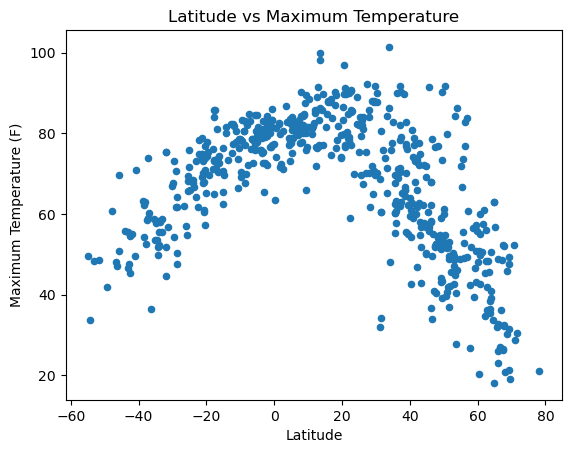

In [8]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(kind='scatter', x='Lat', y='Max Temp')

# Incorporate the other graph properties
plt.title("Latitude vs Maximum Temperature")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature (F)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

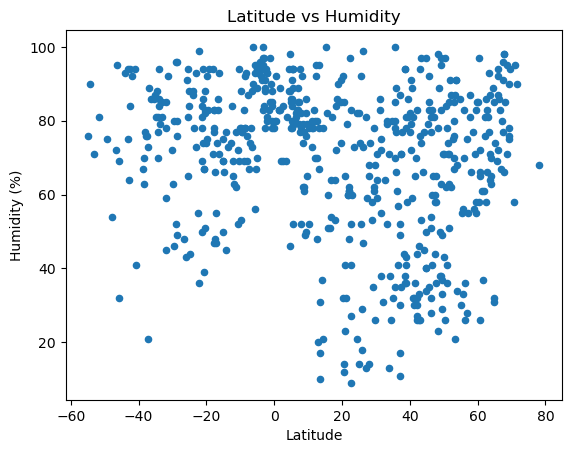

In [9]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind='scatter', x='Lat', y='Humidity')

# Incorporate the other graph properties
plt.title("Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

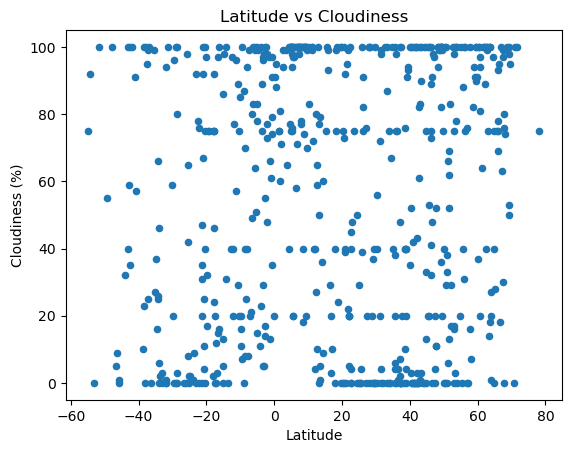

In [10]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind='scatter', x='Lat', y='Cloudiness')

# Incorporate the other graph properties
plt.title("Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

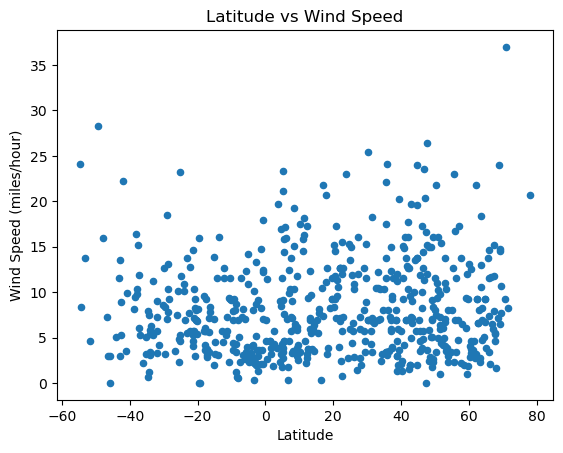

In [11]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind='scatter', x='Lat', y='Wind Speed')

# Incorporate the other graph properties
plt.title("Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (miles/hour)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def regression(hemisphere, weather_variable, ylabel):
    regression = linregress(hemisphere, weather_variable)
    fit = regression[0] * hemisphere + regression[1]
    print(f"The r-value is: {regression[2]}")
    
    plt.scatter(hemisphere, weather_variable)
    plt.plot(hemisphere, fit, "r--", label=f"y={round(regression[0],2)}x + {round(regression[1],2)}")
    plt.legend()
    plt.xlabel("Latitude")
    plt.ylabel(ylabel)
    plt.title(f"{ylabel} vs Latitude")
    plt.show()       

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ribeira grande,38.5167,-28.7000,66.60,94,40,6.91,PT,1684184241
1,tiksi,71.6872,128.8694,30.42,90,100,8.30,RU,1684184246
4,sarupathar,26.1984,93.8094,67.35,99,82,2.84,IN,1684184247
7,iqaluit,63.7506,-68.5145,35.33,64,100,18.41,CA,1684184248
8,caluula,11.9661,50.7569,85.14,80,4,2.15,SO,1684184248


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,passos,-20.7189,-46.6097,61.11,67,4,2.98,BR,1684184247
3,grytviken,-54.2811,-36.5092,33.62,90,92,8.32,GS,1684184247
5,ancud,-41.8697,-73.8203,55.02,92,100,22.24,CL,1684184248
6,margaret river,-33.9500,115.0667,55.51,84,46,5.39,AU,1684184248
9,humaita,-7.5061,-63.0208,84.79,67,99,2.33,BR,1684184249


In [15]:
# Assign latitudes in each hemisphere to a variable
northern = northern_hemi_df['Lat']
southern = southern_hemi_df['Lat']

###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.7666025070477192


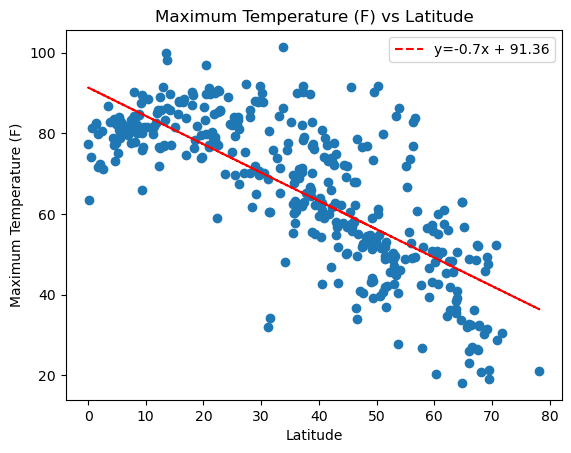

In [16]:
# Linear regression on Northern Hemisphere
regression(northern, northern_hemi_df['Max Temp'], "Maximum Temperature (F)")

The r-value is: 0.822319401168628


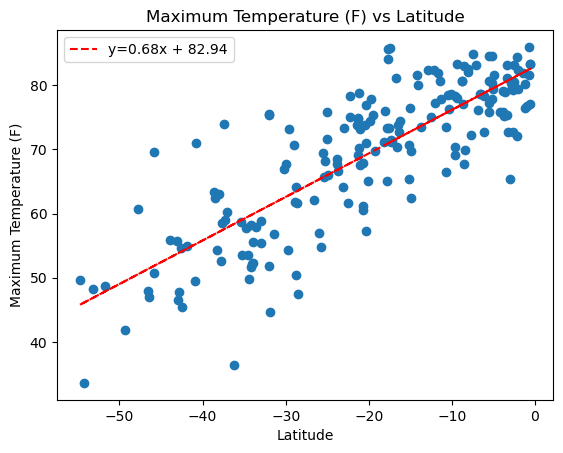

In [17]:
# Linear regression on Southern Hemisphere
regression(southern, southern_hemi_df['Max Temp'], "Maximum Temperature (F)")

**Discussion about the linear relationship:** As expected, the southern hemisphere displays a positive corrolation and the northern hemisphere displays a negative corrolation. This is in line with temperatures dropping as you get further from the equator.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.04240513542168251


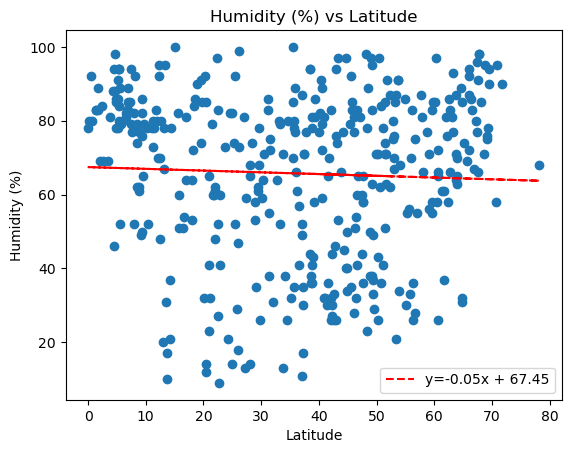

In [18]:
# Northern Hemisphere
regression(northern, northern_hemi_df['Humidity'], "Humidity (%)")

The r-value is: 0.20592821565156155


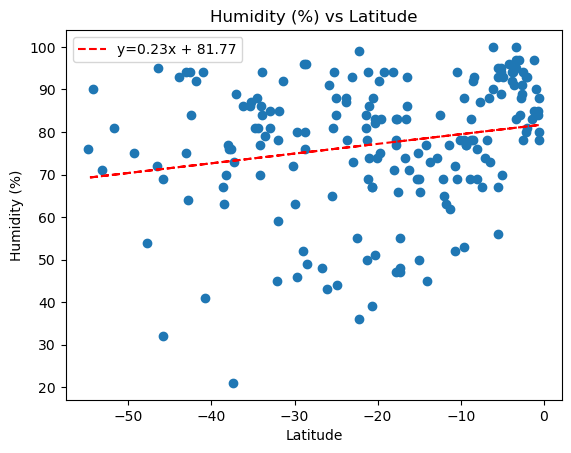

In [19]:
# Southern Hemisphere
regression(southern, southern_hemi_df['Humidity'], "Humidity (%)")

**Discussion about the linear relationship:** The correlation between humidity and latitude is either very weak or nonexistant in both hemispheres.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.046393631513906235


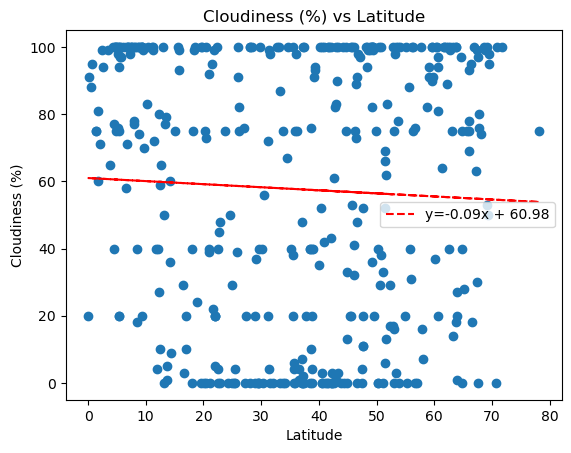

In [20]:
# Northern Hemisphere
regression(northern, northern_hemi_df['Cloudiness'], "Cloudiness (%)")

The r-value is: 0.13647268785822475


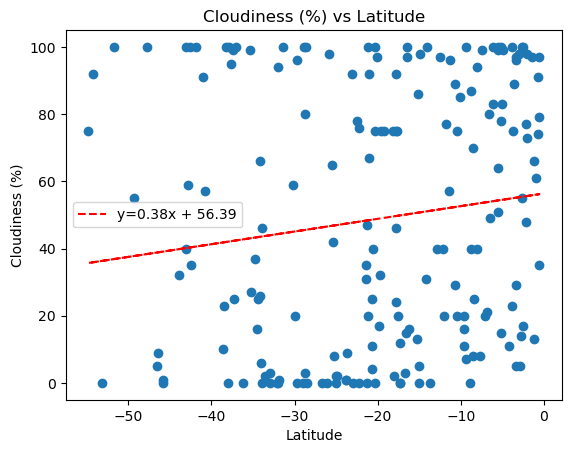

In [21]:
# Southern Hemisphere
regression(southern, southern_hemi_df['Cloudiness'], "Cloudiness (%)")

**Discussion about the linear relationship:** The correlation between cloudiness and latitude is either very weak or nonexistant in both hemispheres. In looking at the graphs, the line does not appear to fit the data at all.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0415812187789518


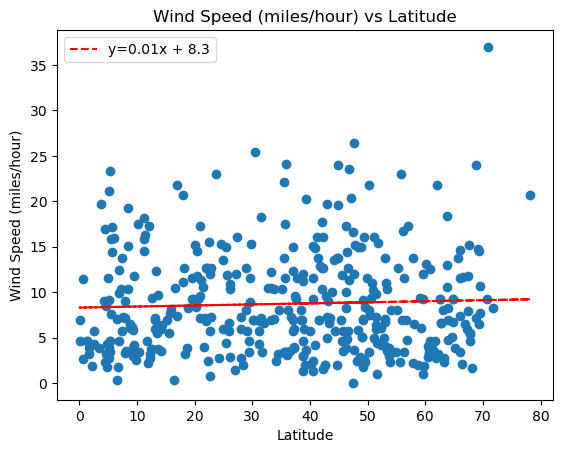

In [22]:
# Northern Hemisphere
regression(northern, northern_hemi_df['Wind Speed'], "Wind Speed (miles/hour)")

The r-value is: -0.24597070265280538


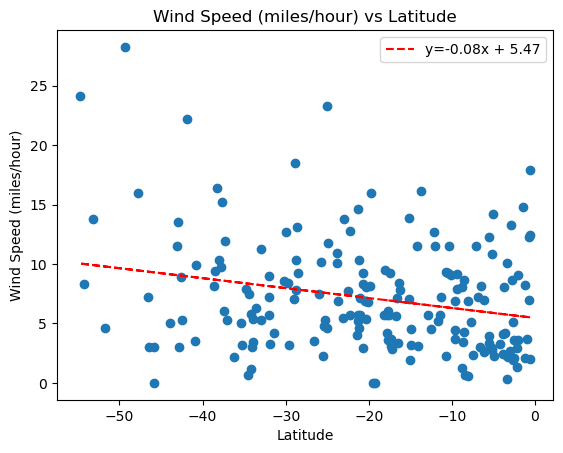

In [23]:
# Southern Hemisphere
regression(southern, southern_hemi_df['Wind Speed'], "Wind Speed (miles/hour)")

**Discussion about the linear relationship:** The correlation between wind speeds and latitude is either very weak or nonexistant in both hemispheres.